In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns; sns.set()
import scipy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [70]:
# read data
audio_type = ['chin','eng']
sub_IDs = []
for i in range(2, 30):
    sub_IDs.append('S'+ str(i))
    
miss = []
fa = []
hit = []
rt_miss = []
rt_fa = []
rt_hit = []

fa_names = []
miss_names = []
hit_names = []
rt_correct = []
rt_incorrect = []


for i in range(len(sub_IDs)):
  miss.append([])
  fa.append([])
  hit.append([])
  rt_miss.append([])
  rt_fa.append([])
  rt_hit.append([])
  rt_correct.append([])
  rt_incorrect.append([])

  for j in range(len(audio_type)):
    if 1: # read from local repo
      url = '../lisTest/tcdDecision/recordings/New_recordings/'+audio_type[j]+'_'+sub_IDs[i]+'/keys.csv'
    else: # read from online repo
      url = 'https://raw.githubusercontent.com/neerajww/lang_tcd/venkat201097-test1/code/lisTest/tcdDecision/recordings/New_recordings/'+audio_type[j]+'_'+sub_IDs[i]+'/keys.csv'
    # load csv into a dataframe
    df = pd.read_csv(url,header=None,error_bad_lines=False)
    # extract the label (1/2), response (1/2), and session (TRAIN/TEST) columns
    indices = df[0].values
    label = df[2].values
    resp = df[3].values
    session = df[4].values
    RT = (df[7].values - df[6].values)*1000 # in msec
    # get index of first TEST stimulus
    session = df[4].values
    for k in range(len(session)):
      if session[k] == 'TEST':
        indx_test = k
        break
    # init HITS and FA 
    miss[i].append(0)
    fa[i].append(0)
    hit[i].append(0)
    # init RTs
    rt_miss[i].append([])
    rt_fa[i].append([])
    rt_hit[i].append([])
    rt_correct[i].append([])
    rt_incorrect[i].append([])
    
    # init indexes
    indx_miss = []
    indx_fa = []
    indx_hit = []
    # compute hits, fa, miss
    for k in range(indx_test,len(label)):
        # MISS
        if int(label[k]) == 2:
          if int(resp[k]) == 1:
            miss[i][j] = miss[i][j]+1
            rt_miss[i][j].append(RT[k])
            indx_miss.append(k)
            
        # FA
        if int(label[k]) == 1:
          if int(resp[k]) == 2:
            fa[i][j] = fa[i][j]+1
            rt_fa[i][j].append(RT[k])
            indx_fa.append(k)
        # HIT
        if int(label[k]) == 2:
          if int(resp[k]) == 2:
            hit[i][j] = hit[i][j]+1
            rt_hit[i][j].append(RT[k])
            indx_hit.append(k)
    
    for k in range(indx_test,len(label)):
      # correct responses
      if int(label[k])==int(resp[k]):
        rt_correct[i][j].append(RT[k])
      else:
        rt_incorrect[i][j].append(RT[k])
         
    # pool the miss and fa files
    temp = df[1].values # get all filenames
    fa_names.extend(temp[indx_fa])
    miss_names.extend(temp[indx_miss])
    hit_names.extend(temp[indx_hit])

# convert to np.array 
miss = np.array(miss)
fa = np.array(fa)
hit = np.array(hit)

In [72]:
# t-test on mean response times
mu_crt_chin = []
mu_crt_eng = []
mu_incrt_chin = []
mu_incrt_eng = []

for i in range(len(rt_correct)):
    chin_temp = [x for x in rt_correct[i][0] if x<=2000]
    mu_crt_chin.append(np.mean(chin_temp))
    eng_temp = [x for x in rt_correct[i][1] if x<=2000]
    mu_crt_eng.append(np.mean(eng_temp))
    
    chin_temp = [x for x in rt_incorrect[i][0] if x<=2000]
    mu_incrt_chin.append(np.mean(chin_temp))
    eng_temp = [x for x in rt_incorrect[i][1] if x<=2000]
    mu_incrt_eng.append(np.mean(eng_temp))
    
# Significance test
twosample_results = scipy.stats.ttest_ind(mu_crt_chin, mu_crt_eng)
print(twosample_results.statistic)
print(twosample_results.pvalue)

twosample_results = scipy.stats.ttest_ind(mu_incrt_chin, mu_incrt_eng)
print(twosample_results.statistic)
print(twosample_results.pvalue)

-2.737241321580917
0.008371081279589302
-4.012736149436432
0.0001862225799630323


In [41]:
# Reaction time analysis
chin_correct = []
chin_incorrect = []
eng_correct = []
eng_incorrect = []

for i in range(len(rt_correct)):
    chin_correct.extend(rt_correct[i][0])
    eng_correct.extend(rt_correct[i][1])
    chin_incorrect.extend(rt_incorrect[i][0])
    eng_incorrect.extend(rt_incorrect[i][1])
    
chin_correct = [x for x in chin_correct if x<=2000]
eng_correct = [x for x in eng_correct if x<=2000]
chin_incorrect = [x for x in chin_incorrect if x<=2000]
eng_incorrect = [x for x in eng_incorrect if x<=2000]

[Text(0,0,'Chinese correct'),
 Text(0,0,'English correct'),
 Text(0,0,'Chinese incorrect'),
 Text(0,0,'English incorrect')]

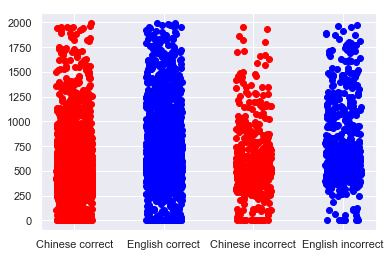

In [42]:
width = 0.2
chin_correctx = np.random.uniform(-width, width, len(chin_correct))
eng_correctx = np.random.uniform(1-width, 1+width, len(eng_correct))
chin_incorrectx = np.random.uniform(2-width, 2+width, len(chin_incorrect))
eng_incorrectx = np.random.uniform(3-width, 3+width, len(eng_incorrect))
labels = ['Chinese correct', 'English correct', 'Chinese incorrect', 'English incorrect']

plt.plot(chin_correctx, chin_correct, 'o', color='red')
plt.plot(eng_correctx, eng_correct, 'o', color='blue')
plt.plot(chin_incorrectx, chin_incorrect, 'o', color='red')
plt.plot(eng_incorrectx, eng_incorrect, 'o', color='blue')
axes = plt.gca()
#axes.set_ylim([0,2000])
axes.set_xticks(range(len(labels)))
axes.set_xticklabels(labels)

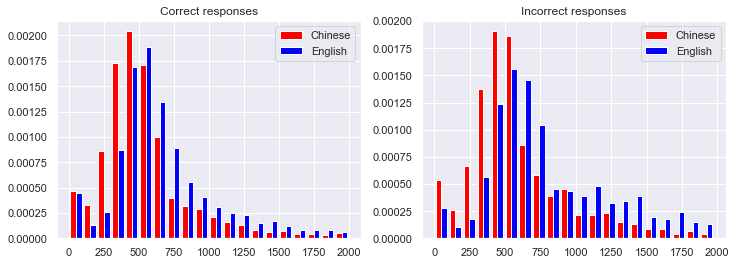

In [43]:
n_bins = 20
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax0, ax1 = axes.flatten()
colors = ['red', 'blue']
data = [chin_correct, eng_correct]
ax0.hist(data, n_bins, density=True, histtype='bar', color=colors)
ax0.legend(['Chinese', 'English'])
ax0.set_title('Correct responses')
data = [chin_incorrect, eng_incorrect]
ax1.hist(data, n_bins, density=True, histtype='bar', color=colors)
ax1.set_title('Incorrect responses')
ax1.legend(['Chinese', 'English'])

In [77]:
# Consistency in errors across files
chin_files_miss = np.zeros((106,))
chin_files_fa = np.zeros((106,))
chin_files_incorrect = np.zeros((106,))
eng_files_miss = np.zeros((110,))
eng_files_fa = np.zeros((110,))
eng_files_incorrect = np.zeros((110,))

for i in range(len(sub_IDs)):
    
    for j in range(len(audio_type)):
        
        url = 'https://raw.githubusercontent.com/neerajww/lang_tcd/venkat201097-test1/code/lisTest/tcdDecision/recordings/New_recordings/'+audio_type[j]+'_'+sub_IDs[i]+'/keys.csv'
        df = pd.read_csv(url,header=None,error_bad_lines=False)
        indices = df[0].values
        label = df[2].values
        resp = df[3].values
        session = df[4].values
        
        label = df[2].values
        resp = df[3].values
        session = df[4].values
        for k in range(len(session)):
            if session[k] == 'TEST':
                indx_test = k
                break
                
        for k in range(indx_test,len(label)):
            
            # MISS
            if int(label[k]) == 2:
                if int(resp[k]) == 1:
                    if audio_type[j]=='chin':
                        chin_files_miss[indices[k]-1] += 1
                    else:
                        eng_files_miss[indices[k]-1] += 1
                        
            # FA
            if int(label[k]) == 1:
                if int(resp[k]) == 2:
                    if audio_type[j]=='chin':
                        chin_files_fa[indices[k]-1] += 1
                    else:
                        eng_files_fa[indices[k]-1] += 1
                        
            # Incorrect
            if int(label[k])!=int(resp[k]):
                if audio_type[j]=='chin':
                    chin_files_incorrect[indices[k]-1] += 1
                else:
                    eng_files_incorrect[indices[k]-1] += 1
            

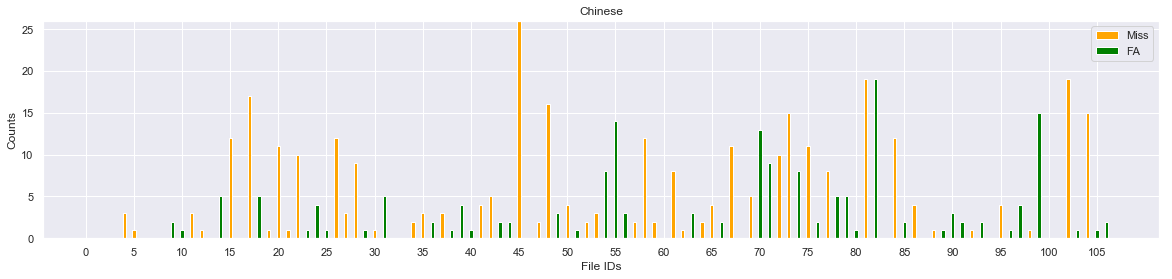

In [113]:
ind = np.arange(1,len(chin_files_incorrect)+1)   
w = 0.35 
fig= plt.figure(figsize=(20, 4))
p1 = plt.bar(ind, chin_files_miss, width=w, color='orange')
p2 = plt.bar(ind, chin_files_fa, width=w,
             bottom=chin_files_miss, color='green')

plt.ylabel('Counts')
plt.title('Chinese')
plt.xticks(np.arange(0, len(chin_files_incorrect)+1, 5))
plt.xlabel('File IDs')
plt.legend((p1[0], p2[0]), ('Miss', 'FA'))
plt.show()

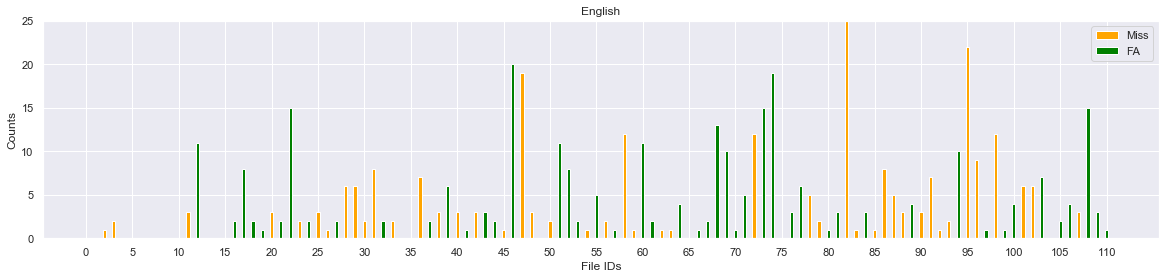

In [114]:
ind = np.arange(1,len(eng_files_incorrect)+1)   
w = 0.35 
fig= plt.figure(figsize=(20, 4))
p1 = plt.bar(ind, eng_files_miss, width=w, color='orange')
p2 = plt.bar(ind, eng_files_fa, width=w,
             bottom=eng_files_miss, color='green')

plt.ylabel('Counts')
plt.title('English')
plt.xticks(np.arange(0, len(eng_files_incorrect)+1, 5))
plt.xlabel('File IDs')
plt.legend((p1[0], p2[0]), ('Miss', 'FA'))
plt.show()